Quantum phase estimation (QPE) is a quantum algorithm to estimate the phase corresponding to an eigenvalue of a given unitary operator. Because the eigenvalues of a unitary operator have unit modulus thay are characterized by their phase, and therefore the algorithm can be descrived ad retrieving the phase or the eigenvalue itslef. Is used as a subroutine in Shor's algorithm, in HHL algorithm and other cases.

$U |\psi> = e^{2\pi i \theta} |\psi> $

$\theta$ is the phase charcterizing the eigenvalue of the operator $U$

The goal is to produce a good approximation for $\theta$ with a small number of gates and high probability of success.

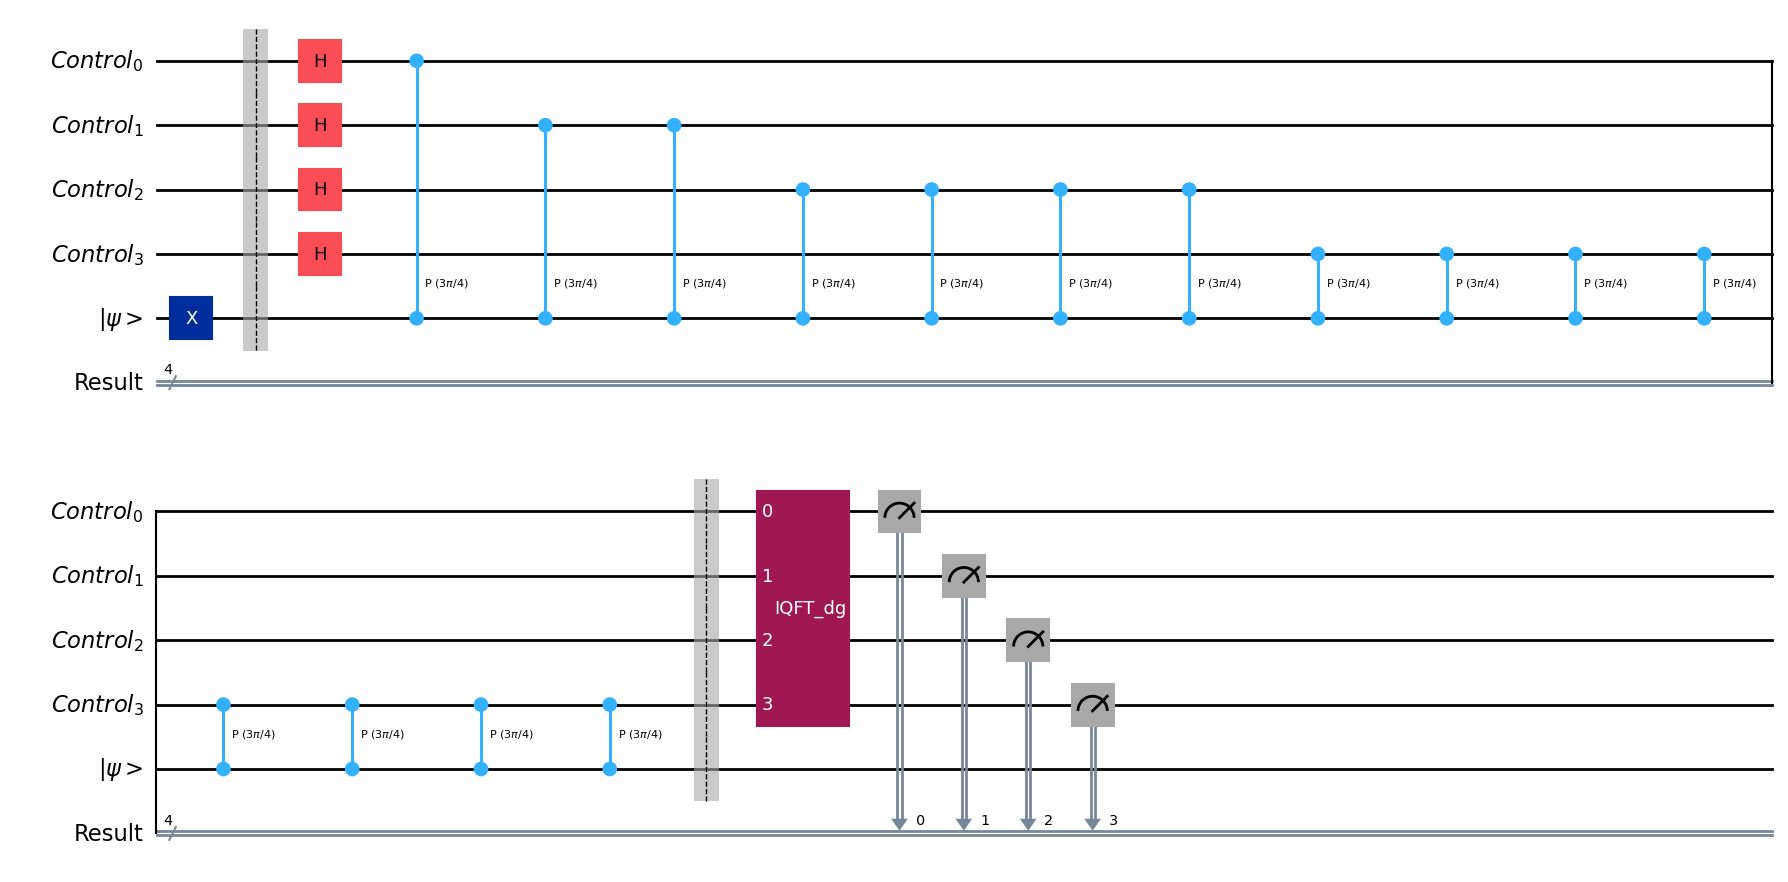

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from math import pi



theta = 0.375 # In our case theta can go from 0 to 1
m = 4  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw('mpl'))

/tmp/ipykernel_122335/1893497209.py:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc, shots=1024).result()


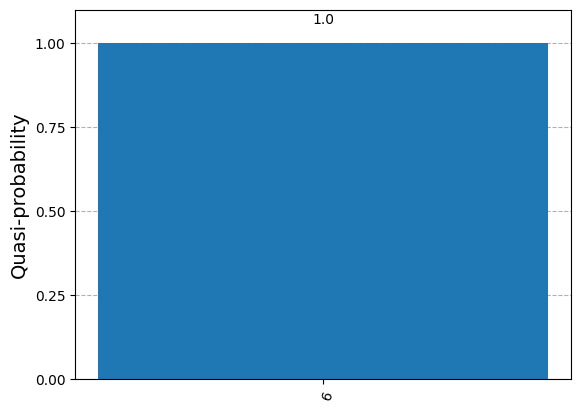

In [18]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

result = Sampler().run(qc, shots=1024).result()
display(plot_histogram(result.quasi_dists))

In [19]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 6
Estimated theta: 0.375
